<a href="https://colab.research.google.com/github/manojgupta3051994/Analytics-Vidhya-Hackathon-Projects/blob/master/Cross_Sell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab
!pip install imbalanced-learn
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn import model_selection, preprocessing
import xgboost as xgb
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


     |████████████████████████████████| 66.1MB 52kB/s 


In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [4]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,381109,NaN,NaN,NaN,190555,110017,1,95278,190555,285832,381109
Gender,381109,2,Male,206089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,381109,NaN,NaN,NaN,38.8226,15.5116,20,25,36,49,85
Driving_License,381109,NaN,NaN,NaN,0.997869,0.0461095,0,1,1,1,1
Region_Code,381109,NaN,NaN,NaN,26.3888,13.2299,0,15,28,35,52
Previously_Insured,381109,NaN,NaN,NaN,0.45821,0.498251,0,0,0,1,1
Vehicle_Age,381109,3,1-2 Year,200316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,381109,2,Yes,192413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,381109,NaN,NaN,NaN,30564.4,17213.2,2630,24405,31669,39400,540165
Policy_Sales_Channel,381109,NaN,NaN,NaN,112.034,54.204,1,29,133,152,163


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
num_df = train.drop(['id','Response'],1).select_dtypes('number')
cat_df = train.select_dtypes('O')

In [8]:
num_df

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0,44,1,28.0,0,40454.0,26.0,217
1,76,1,3.0,0,33536.0,26.0,183
2,47,1,28.0,0,38294.0,26.0,27
3,21,1,11.0,1,28619.0,152.0,203
4,29,1,41.0,1,27496.0,152.0,39
...,...,...,...,...,...,...,...
381104,74,1,26.0,1,30170.0,26.0,88
381105,30,1,37.0,1,40016.0,152.0,131
381106,21,1,30.0,1,35118.0,160.0,161
381107,68,1,14.0,0,44617.0,124.0,74


In [9]:
cat_df

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No
...,...,...,...
381104,Male,1-2 Year,No
381105,Male,< 1 Year,No
381106,Male,< 1 Year,No
381107,Female,> 2 Years,Yes


In [10]:
num_df['Annual_Premium'] = np.sqrt(num_df['Annual_Premium'])

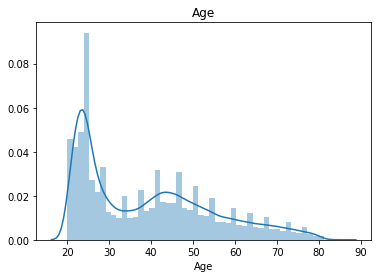

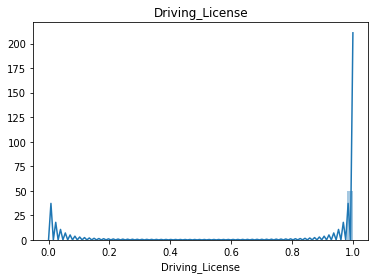

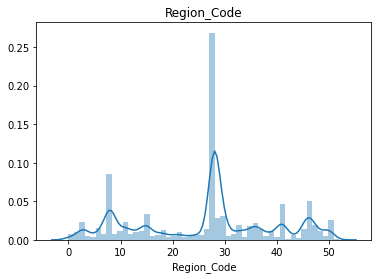

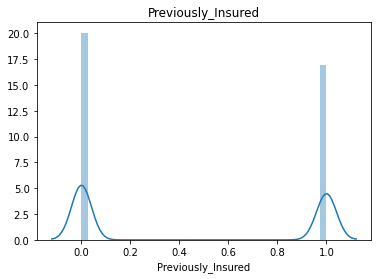

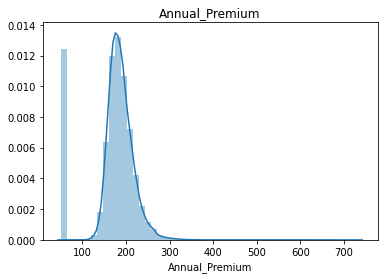

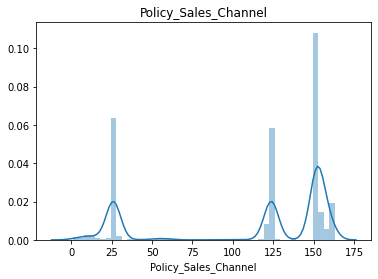

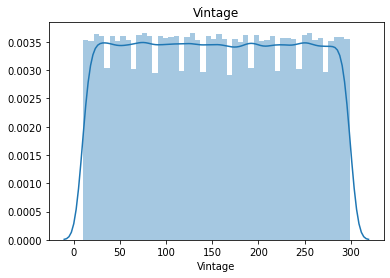

<Figure size 432x288 with 0 Axes>

In [11]:
for i in num_df.columns:
  plt.title(i)
  sns.distplot(num_df[i])
  plt.show()
  plt.tight_layout()

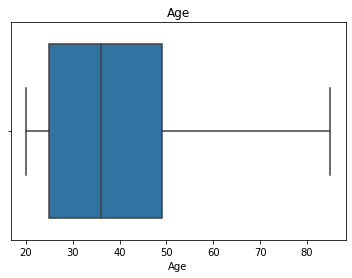

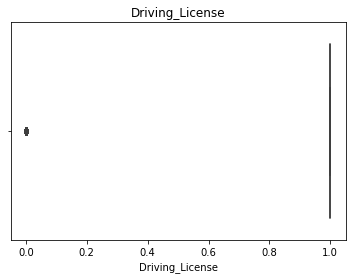

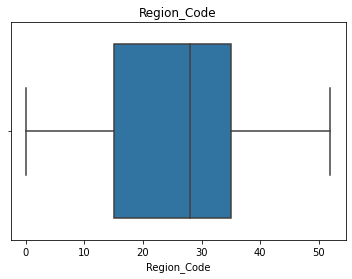

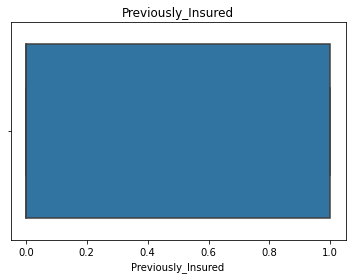

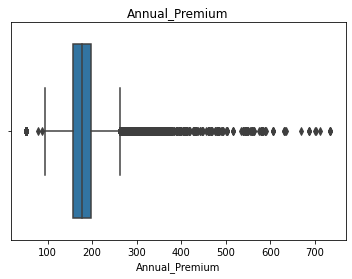

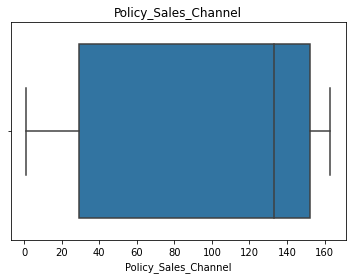

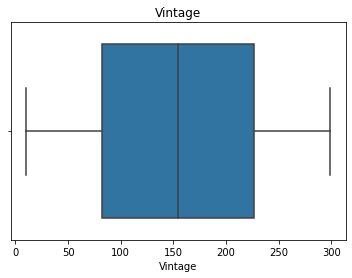

<Figure size 432x288 with 0 Axes>

In [12]:
for i in num_df.columns:
  plt.title(i)
  sns.boxplot(num_df[i])
  plt.show()
  plt.tight_layout()

In [13]:
def plot_data(df):
  for i in df.columns:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[i].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[i],dist='norm',plot=pylab)

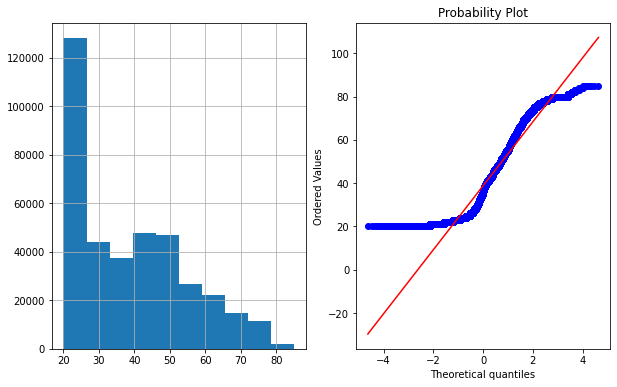

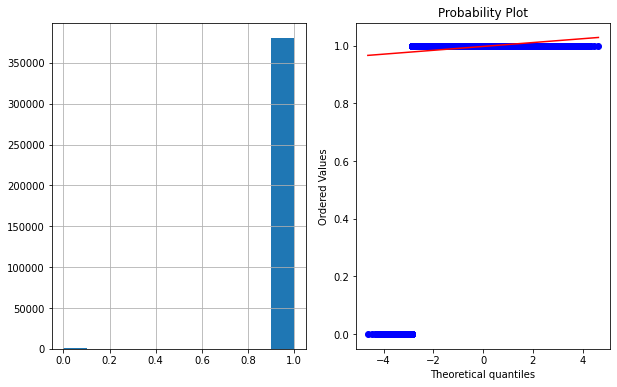

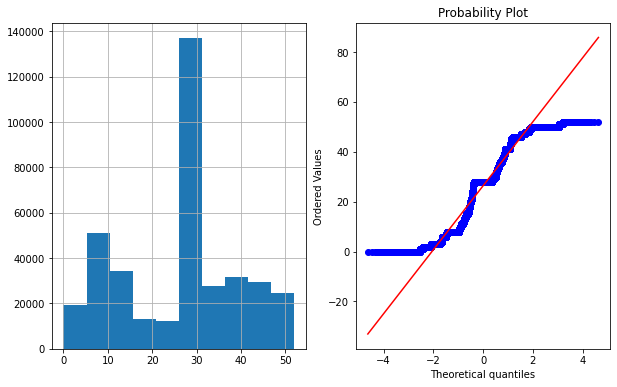

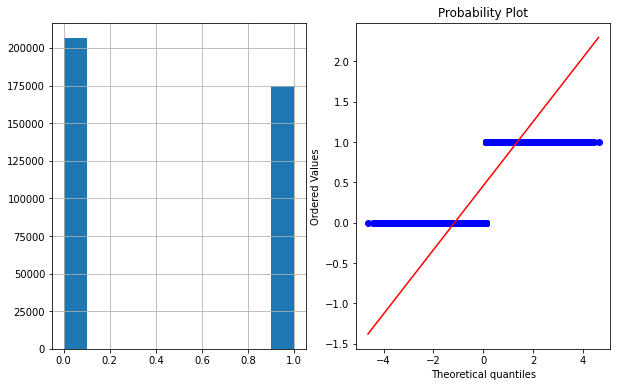

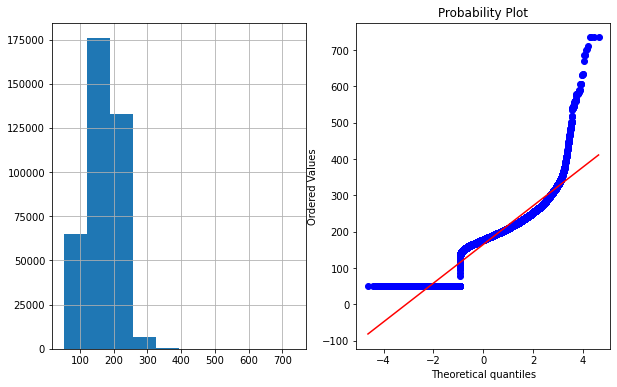

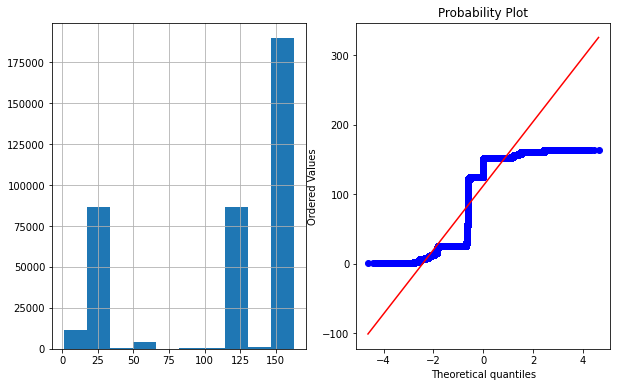

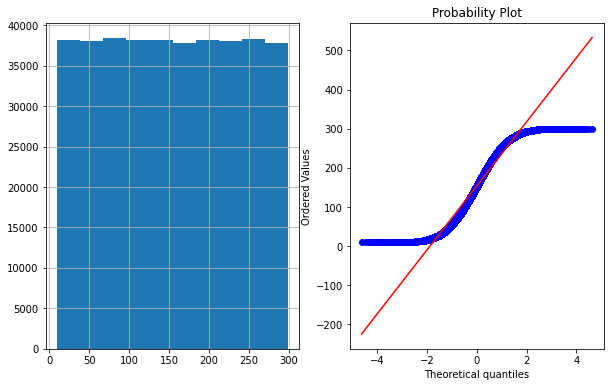

In [14]:
plot_data(num_df)

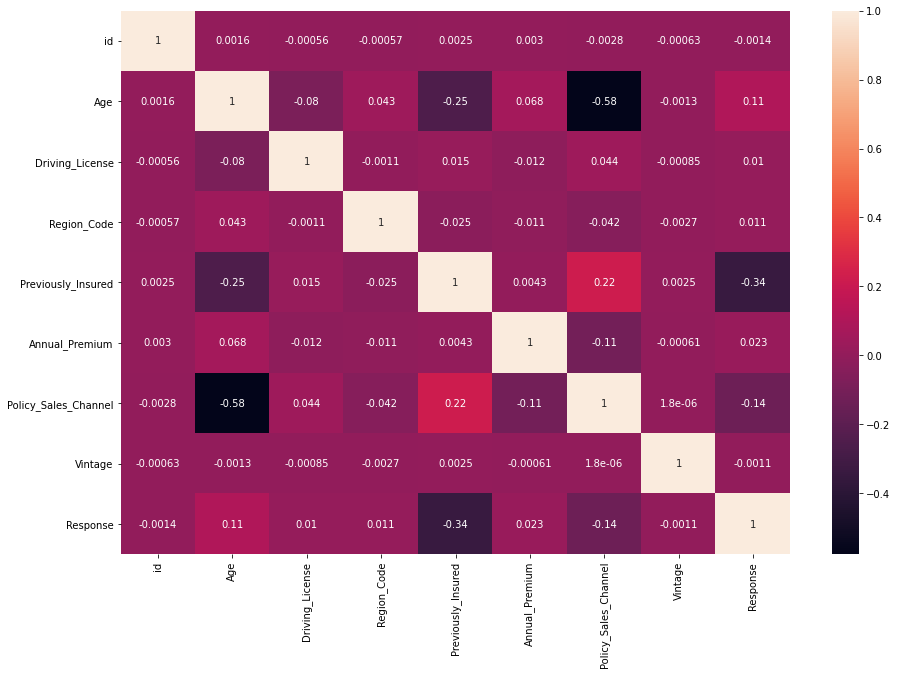

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(15,10))
corr = train.corr()
top_features = corr.index 
sns.heatmap(train[top_features].corr(), annot=True)
plt.show()
plt.tight_layout()

In [16]:
#Correlation with output variable
cor_target = abs(corr["Response"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]
relevant_features

Age                     0.111147
Driving_License         0.010155
Region_Code             0.010570
Previously_Insured      0.341170
Annual_Premium          0.022575
Policy_Sales_Channel    0.139042
Response                1.000000
Name: Response, dtype: float64

In [17]:
cat_df

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No
...,...,...,...
381104,Male,1-2 Year,No
381105,Male,< 1 Year,No
381106,Male,< 1 Year,No
381107,Female,> 2 Years,Yes


In [18]:
cat_df.replace(to_replace=['Male','Female'],value=[1,0],inplace=True)
cat_df.replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
cat_df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Gender,Vehicle_Age,Vehicle_Damage
0,1,> 2 Years,1
1,1,1-2 Year,0
2,1,> 2 Years,1
3,1,< 1 Year,0
4,0,< 1 Year,0


In [19]:
dum_df = pd.get_dummies(cat_df,columns=['Vehicle_Age'],prefix=['Vehicle_Age_Is'],drop_first=True)
dum_df.head()

,Gender,Vehicle_Damage,Vehicle_Age_Is_< 1 Year,Vehicle_Age_Is_> 2 Years
0,1,1,0,1
1,1,0,0,0
2,1,1,0,1
3,1,0,1,0
4,0,0,1,0


0    87.743664
1    12.256336
Name: Response, dtype: float64


0    334399
1     46710
Name: Response, dtype: int64

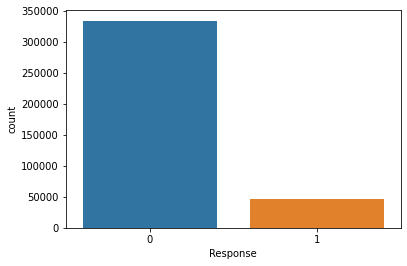

In [20]:
sns.countplot(x = 'Response', data= train)

print (train['Response'].value_counts()/len(train)*100)

train['Response'].value_counts()

In [21]:
train_new = pd.concat([num_df,dum_df],axis=1)
train_new.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender,Vehicle_Damage,Vehicle_Age_Is_< 1 Year,Vehicle_Age_Is_> 2 Years
0,44,1,28.0,0,201.131798,26.0,217,1,1,0,1
1,76,1,3.0,0,183.128370,26.0,183,1,0,0,0
2,47,1,28.0,0,195.688528,26.0,27,1,1,0,1
3,21,1,11.0,1,169.171511,152.0,203,1,0,1,0
4,29,1,41.0,1,165.819179,152.0,39,0,0,1,0


In [60]:
X = train_new.iloc[:,:]
y = train['Response']

In [61]:
X.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender,Vehicle_Damage,Vehicle_Age_Is_< 1 Year,Vehicle_Age_Is_> 2 Years
0,44,1,28.0,0,201.131798,26.0,217,1,1,0,1
1,76,1,3.0,0,183.128370,26.0,183,1,0,0,0
2,47,1,28.0,0,195.688528,26.0,27,1,1,0,1
3,21,1,11.0,1,169.171511,152.0,203,1,0,1,0
4,29,1,41.0,1,165.819179,152.0,39,0,0,1,0


In [62]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

In [63]:
smt = SMOTETomek(sampling_strategy='auto')
X,y = smt.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

In [29]:
model = SelectFromModel(etc, prefit=True)
X_etc = model.transform(X)
X_etc.shape

(656350, 5)

In [ ]:
etc = ExtraTreesClassifier()
etc.fit(X, y)



In [30]:
xgboost = xgb.XGBClassifier()

In [32]:
#QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(xgb.XGBClassifier(), X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [54]:
x = xgb.XGBClassifier()
x.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [34]:
print(QDA_roc)

0.9519918181845428


In [26]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

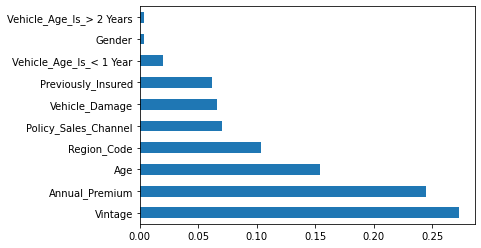

In [ ]:
feat = pd.Series(model.feature_importances_,index=X.columns)
feat.nlargest(10).plot(kind='barh')
plt.show()

In [65]:

# Spot Check Algorithms
Mymodels = []
#Mymodels.append(('RandomForest', RandomForestClassifier()))
#Mymodels.append(('SGDclassifier', SGDClassifier()))
#Mymodels.append(('KNearestNeighbors', KNeighborsClassifier()))
#Mymodels.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
#Mymodels.append(('GaussianNB', GaussianNB()))
#Mymodels.append(('SVM', SVC()))
#Mymodels.append(('CatBoost',CatBoostClassifier()))
#Mymodels.append(('ExtraTrees',ExtraTreesClassifier()))
Mymodels.append(('xgboost',xgb.XGBClassifier()))

# Evaluate each model in turn

for name, model in Mymodels:
    skf = StratifiedKFold(n_splits=10,random_state=None)
    skf.get_n_splits(X,y)
    for train_index, test_index in skf.split(X,y):
      print('Train:', train_index, 'Test',test_index)
      X1_train,X1_test = X[train_index],X[test_index]
      y1_train,y1_test = y[train_index],y[test_index]
      model.fit(X1_train,y1_train)
      y_pred = model.predict(X1_test)
      
      

Train: [ 18768  18770  18771 ... 656383 656384 656385] Test [     0      1      2 ... 133192 133198 133200]
Train: [     0      1      2 ... 656383 656384 656385] Test [ 18768  18770  18771 ... 264712 264713 264715]
Train: [     0      1      2 ... 656383 656384 656385] Test [ 37405  37406  37407 ... 377420 377421 377422]
Train: [     0      1      2 ... 656383 656384 656385] Test [ 56194  56195  56196 ... 393830 393831 393832]
Train: [     0      1      2 ... 656383 656384 656385] Test [ 74987  74989  74990 ... 410240 410241 410242]
Train: [     0      1      2 ... 656383 656384 656385] Test [ 93704  93705  93706 ... 426650 426651 426652]
Train: [     0      1      2 ... 656383 656384 656385] Test [112398 112401 112402 ... 443060 443061 443062]
Train: [     0      1      2 ... 656383 656384 656385] Test [131010 131011 131012 ... 459470 459471 459472]
Train: [     0      1      2 ... 656383 656384 656385] Test [149749 149750 149752 ... 475880 475881 475882]
Train: [     0      1      2

In [67]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y1_test,y_pred)
score

0.8656600718033151

In [86]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [87]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [88]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [89]:
classifier=xgboost.XGBClassifier()

In [90]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [92]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 14.2min finished



 Time taken: 0 hours 15 minutes and 16.62 seconds.


In [94]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
              learning_rate=0.15, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [95]:
random_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.3,
 'learning_rate': 0.15,
 'max_depth': 10,
 'min_child_weight': 1}

In [96]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0.3, learning_rate=0.15,
       max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [116]:
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(classifier, X, y, scoring=scoring, cv=10)

In [117]:
scores['test_roc_auc'].mean()

0.9777608524456746

In [136]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

In [137]:
score.mean()

0.9042670730398708

In [118]:
classifier.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
              learning_rate=0.15, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [141]:
!pip install scikit-plot
import scikitplot as skplt

In [142]:
prob = model.predict_proba(X1_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


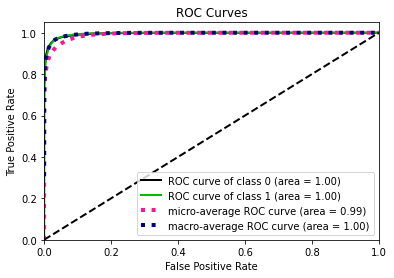

In [143]:
skplt.metrics.plot_roc_curve(y1_test, prob)

In [138]:
test = pd.read_csv('test.csv')

In [139]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [140]:
Test_ID = test['id']

In [141]:
test.drop('id',1,inplace=True)

In [142]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,127037,2,Male,68236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,127037,NaN,NaN,NaN,38.7659,15.4658,20,25,36,49,85
Driving_License,127037,NaN,NaN,NaN,0.998134,0.0431524,0,1,1,1,1
Region_Code,127037,NaN,NaN,NaN,26.4599,13.2099,0,15,28,35,52
Previously_Insured,127037,NaN,NaN,NaN,0.460039,0.498403,0,0,0,1,1
Vehicle_Age,127037,3,1-2 Year,66699,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,127037,2,Yes,63835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,127037,NaN,NaN,NaN,30524.6,16945.3,2630,24325,31642,39408,472042
Policy_Sales_Channel,127037,NaN,NaN,NaN,111.8,54.3718,1,26,135,152,163
Vintage,127037,NaN,NaN,NaN,154.318,83.6616,10,82,154,227,299


In [143]:
test_num_df = test.select_dtypes('number')
test_cat_df = test.select_dtypes('O')

In [144]:
test_num_df['Annual_Premium'] = np.sqrt(test_num_df['Annual_Premium'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
test_cat_df.replace(to_replace=['Male','Female'],value=[1,0],inplace=True)
test_cat_df.replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
test_cat_df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Gender,Vehicle_Age,Vehicle_Damage
0,1,< 1 Year,0
1,1,1-2 Year,1
2,1,1-2 Year,1
3,1,< 1 Year,1
4,1,< 1 Year,0


In [146]:
test_dum_df = pd.get_dummies(test_cat_df,columns=['Vehicle_Age'],prefix=['Vehicle_Age_Is'],drop_first=True)
test_dum_df.head()

,Gender,Vehicle_Damage,Vehicle_Age_Is_< 1 Year,Vehicle_Age_Is_> 2 Years
0,1,0,1,0
1,1,1,0,0
2,1,1,0,0
3,1,1,1,0
4,1,0,1,0


In [147]:
test_new = pd.concat([test_num_df,test_dum_df],axis=1)
test_new.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender,Vehicle_Damage,Vehicle_Age_Is_< 1 Year,Vehicle_Age_Is_> 2 Years
0,25,1,11.0,1,189.171880,152.0,53,1,0,1,0
1,40,1,28.0,0,183.744388,7.0,111,1,1,0,0
2,47,1,28.0,0,200.124961,124.0,199,1,1,0,0
3,24,1,27.0,1,193.277003,152.0,187,1,1,1,0
4,27,1,28.0,1,243.098745,152.0,297,1,0,1,0


In [148]:
Final = test_new.iloc[:].values
Final

array([[25.,  1., 11., ...,  0.,  1.,  0.],
       [40.,  1., 28., ...,  1.,  0.,  0.],
       [47.,  1., 28., ...,  1.,  0.,  0.],
       ...,
       [21.,  1., 46., ...,  0.,  1.,  0.],
       [71.,  1., 28., ...,  0.,  0.,  0.],
       [41.,  1., 29., ...,  0.,  0.,  0.]])

In [149]:
test_new['Response'] = classifier.predict(Final)

In [150]:
Submissions = pd.concat([Test_ID,test_new['Response']],axis=1)

In [151]:
Submissions

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


In [152]:
Submissions['Response'].value_counts()

0    118446
1      8591
Name: Response, dtype: int64

In [134]:
 Submissions.to_csv('Cross_Sell_Submission.csv',index=False)